In [1]:
#subset by longitude to look for local effects
import os
import sys
import matplotlib
import matplotlib.pyplot as plt
import dask.array as da
import dask.dataframe as dd
import xarray as xr
from xnemogcm import open_domain_cfg, get_metrics
import xgcm
import cartopy.crs as ccrs
import cmocean
import numpy as np
from scipy.stats import linregress
import datetime
import pandas as pd
import plots_spatial as pltspat
# Add SouthernDemons library to PATH
sys.path.append(os.path.abspath("../lib/"))
from teos_ten import teos_sigma0
import datesandtime

# Subdomain information (As inputted into TRACMASS, note non-pythonic indexing)
imindom = 1
imaxdom = 1440
jmindom = 1
jmaxdom = 400
kmindom = 1
kmaxdom = 75

# Location of the TRACMASS run
data_dir = os.path.abspath("/gws/nopw/j04/bas_pog/astyles/ORCA025_fwd/")

# Location of the OUTPUT directory created when running SouthernDemons executable
out_dir = os.path.abspath(data_dir + "/OUTPUT.ORCA025_fwd_extra/")
ndense_path = os.path.abspath("/gws/nopw/j04/bas_pog/astyles/SouthernDemons/neutraldensity/output/ORCA025_Dec1982/*.nc" )
# Location of masks and grid information for the model
grid_path = os.path.abspath("/gws/nopw/j04/bas_pog/astyles/ORCA025_fwd/topo" )
grid_files = ['mask.nc','mesh_hgr.nc','mesh_zgr.nc']

cal_months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

# Use dask to load the tabulated data lazily 
#df_ini = dd.read_parquet(out_dir + f"/df_ini.combined.parquet")
#df_out = dd.read_parquet(out_dir + f"/df_out.combined.parquet")
df_vent = dd.read_parquet(out_dir + f"/df_vent.parquet")
#ds_domain = open_domain_cfg( datadir=grid_path, files = grid_files )

KeyboardInterrupt: 

In [ ]:
ds_nd = xr.open_mfdataset(ndense_path, chunks='auto')


In [ ]:
nd_coord = ds_nd.sigma_ver.values

def nd_bin_to_density( x ):
    # If x == -1 -> No density surface intersects the fluid column. Retain value of -1
    if x < 0:
        out = -1

    # Otherwise return the neutral density value
    else:
        out = nd_coord[ x - 1 ]

    return out

print("nd_bin_ini = 6 --> ", nd_bin_to_density( 6 ))
print("nd_bin_ini = 25 --> ", nd_bin_to_density( 25 ))
print("nd_bin_ini = -1 --> ", nd_bin_to_density( -1 ))

In [ ]:
nd_bin_to_density( 174 )

In [11]:
df_vent['ndense'] = df_vent['nd_bin_ini'].apply(nd_bin_to_density, meta=('sigma_ver',float))


In [12]:
df = df_vent[['ndense','density_o','bathy_depth_o']]
df=df[df['ndense']>1000]

In [13]:
df_group= df.groupby('ndense')
dens = df_group.mean('density_o').compute()

dens = dens.reset_index()
dens=dens.sort_values('ndense')

In [14]:
dens=dens.sort_values('ndense')

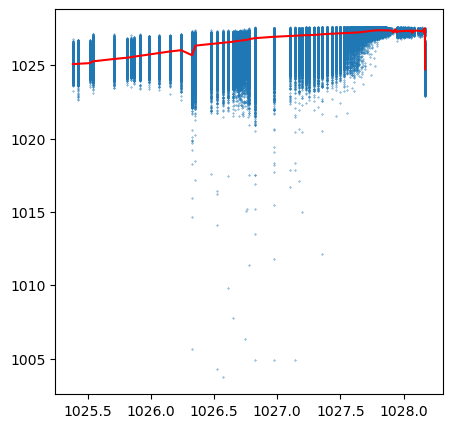

In [16]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df['ndense'],1000+df['density_o'],s=0.1)
plt.plot(dens['ndense'],1000+dens['density_o'],c='red')


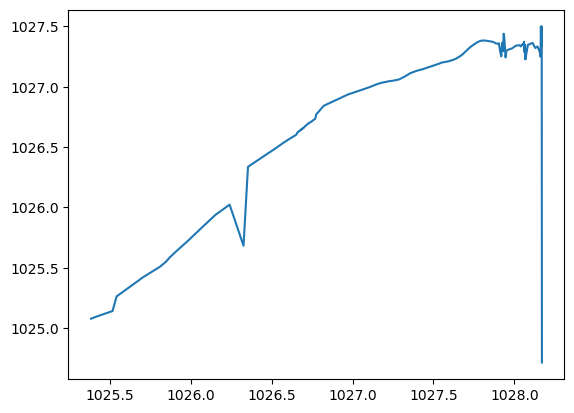

In [34]:
plt.plot(dens['ndense'],1000+dens['density_o'])

(1025.0, 1028.5)

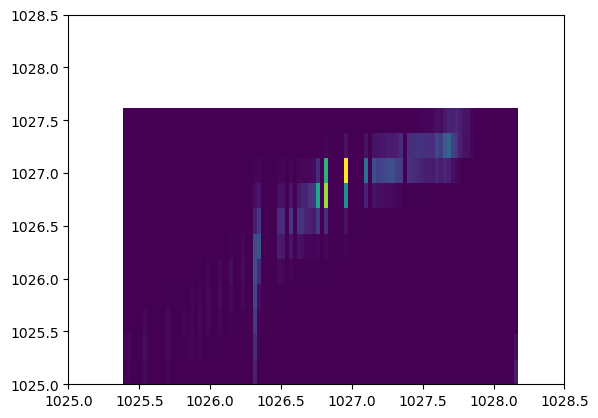

In [11]:
plt.hist2d(df['ndense'],1000+df['density_o'],bins=(100,100))
plt.xlim(1025,1028.5)
plt.ylim(1025,1028.5)

In [ ]:
# look at data for density<1020

In [5]:
df_int = df[df['density_o']<20]



KeyboardInterrupt



In [ ]:
df_int.head(10)

In [3]:
df_int2 = df_vent[1000 + df_vent['density_o']<1020]

In [4]:
df_int2.head(10)

,ntraj_o,x_o,y_o,z_o,subvol_o,time_o,boxface_o,temp_o,sal_o,density_o,...,binnedx_i,binnedy_i,binnedz_i,binnedx_o,binnedy_o,binnedz_o,nd_bin_ini,sf_zint,bathy_depth_i,bathy_depth_o
217064,104436,922.25,337.81,8.0,8.904490e+08,10845466.98,6,19.05,26.62,18.59,...,915,328,16,922,338,8,-1,-121.421544,60.0,0.0


In [ ]:
#################### Going mad looking at scatter plot vs filtered data

In [2]:
df_vent = dd.read_parquet(out_dir + f"/df_vent.parquet")


In [3]:
df1 = df_vent[['density_o','ntraj_o']]
df_low = df1[df1['density_o']<20.0]